# Exploratory Data Analysis – Diet & Sleep Study

This notebook begins the exploratory analysis for understanding the relationship between dietary factors (e.g., macronutrient intake, fiber, meal timing) and sleep quality (e.g., deep sleep %, total sleep hours). The analysis is based on self-tracked data from MyFitnessPal and a smartwatch.



In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: prettier plots
sns.set(style="whitegrid")

# Optional: make charts display inline in notebooks
%matplotlib inline


In [60]:
# Load the datasets
diet_df = pd.read_csv('data/diet_data.csv')
sleep_df = pd.read_csv('data/sleep_data.csv')

# Show first few rows
print("Diet Data:")
display(diet_df.head())

print("\nSleep Data:")
display(sleep_df.head())


Diet Data:


,Date,Calories,Protein (g),Fat (g),Carbohydrates (g),Fiber (g),Sugar (g),Last Meal Hour
0,2025-01-01,2349,88,80,311,28,46,22
1,2025-01-02,2674,102,63,272,26,43,19
2,2025-01-03,2273,61,44,228,22,55,18
3,2025-01-04,1928,69,92,241,31,29,21
4,2025-01-05,2037,92,53,265,25,46,20



Sleep Data:


,Date,Total Sleep (hrs),Sleep Efficiency (%),Deep Sleep (%),REM Sleep (%),Light Sleep (%),Resting Heart Rate,Natural Wakeup
0,2025-01-01,6.62,97.5,11.1,26.6,62.3,53.0,True
1,2025-01-02,8.06,85.0,14.7,19.6,65.7,55.7,True
2,2025-01-03,7.55,87.7,13.8,23.4,62.8,58.8,True
3,2025-01-04,6.59,90.5,15.1,25.8,59.1,55.1,False
4,2025-01-05,7.60,90.7,21.8,13.7,64.6,56.7,True


In [61]:
# Check structure and basic statistics

print("📋 Diet Data Info:")
diet_df.info()
print("\n📊 Diet Data Summary:")
display(diet_df.describe())

print("\n📋 Sleep Data Info:")
sleep_df.info()
print("\n📊 Sleep Data Summary:")
display(sleep_df.describe())


📋 Diet Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               83 non-null     object
 1   Calories           83 non-null     int64 
 2   Protein (g)        83 non-null     int64 
 3   Fat (g)            83 non-null     int64 
 4   Carbohydrates (g)  83 non-null     int64 
 5   Fiber (g)          83 non-null     int64 
 6   Sugar (g)          83 non-null     int64 
 7   Last Meal Hour     83 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 5.3+ KB

📊 Diet Data Summary:


,Calories,Protein (g),Fat (g),Carbohydrates (g),Fiber (g),Sugar (g),Last Meal Hour
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,2230.939759,87.445783,69.771084,250.253012,29.421687,53.216867,20.216867
std,266.469343,13.812554,15.278173,35.031290,8.720764,15.875313,1.465441
min,1686.000000,60.000000,31.000000,158.000000,4.000000,19.000000,18.000000
25%,2028.000000,77.000000,58.000000,227.500000,23.500000,43.000000,19.000000
50%,2228.000000,87.000000,70.000000,255.000000,29.000000,53.000000,20.000000
75%,2345.500000,100.000000,79.500000,272.000000,35.500000,62.500000,22.000000
max,2857.000000,118.000000,102.000000,325.000000,55.000000,108.000000,22.000000



📋 Sleep Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  83 non-null     object 
 1   Total Sleep (hrs)     83 non-null     float64
 2   Sleep Efficiency (%)  83 non-null     float64
 3   Deep Sleep (%)        83 non-null     float64
 4   REM Sleep (%)         83 non-null     float64
 5   Light Sleep (%)       83 non-null     float64
 6   Resting Heart Rate    83 non-null     float64
 7   Natural Wakeup        83 non-null     bool   
dtypes: bool(1), float64(6), object(1)
memory usage: 4.7+ KB

📊 Sleep Data Summary:


,Total Sleep (hrs),Sleep Efficiency (%),Deep Sleep (%),REM Sleep (%),Light Sleep (%),Resting Heart Rate
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,7.518313,87.189157,18.821687,22.263855,58.907229,60.513253
std,0.978381,4.877300,5.183582,4.836890,6.997487,4.633436
min,4.850000,74.500000,5.600000,10.900000,41.400000,53.000000
25%,6.920000,83.900000,14.800000,19.400000,54.450000,57.350000
50%,7.560000,87.200000,18.900000,22.400000,59.600000,60.100000
75%,8.185000,90.000000,23.150000,25.250000,63.250000,63.200000
max,9.770000,98.400000,30.900000,35.200000,76.300000,72.800000


## 🔄 Next Steps

Here’s what I’ll work on next:

- Merge diet and sleep datasets based on date
- Filter out days with missing values or when alarm was used
- Create new features (e.g., "Hours Before Sleep" from last meal time)
- Generate visualizations:
  - Time series trends
  - Correlation heatmap
  - Scatter plots and box plots
- Conduct first hypothesis test:
  - Fiber intake vs. deep sleep %


In [62]:
# Ensure 'Date' columns are datetime format
diet_df['Date'] = pd.to_datetime(diet_df['Date'])
sleep_df['Date'] = pd.to_datetime(sleep_df['Date'])

# Merge on 'Date' using inner join
merged_df = pd.merge(diet_df, sleep_df, on='Date', how='inner')

# Show merged result
print(" Merged Dataset Preview:")
display(merged_df.head())


 Merged Dataset Preview:


,Date,Calories,Protein (g),Fat (g),Carbohydrates (g),Fiber (g),Sugar (g),Last Meal Hour,Total Sleep (hrs),Sleep Efficiency (%),Deep Sleep (%),REM Sleep (%),Light Sleep (%),Resting Heart Rate,Natural Wakeup
0,2025-01-01,2349,88,80,311,28,46,22,6.62,97.5,11.1,26.6,62.3,53.0,True
1,2025-01-02,2674,102,63,272,26,43,19,8.06,85.0,14.7,19.6,65.7,55.7,True
2,2025-01-03,2273,61,44,228,22,55,18,7.55,87.7,13.8,23.4,62.8,58.8,True
3,2025-01-04,1928,69,92,241,31,29,21,6.59,90.5,15.1,25.8,59.1,55.1,False
4,2025-01-05,2037,92,53,265,25,46,20,7.60,90.7,21.8,13.7,64.6,56.7,True


In [63]:
# Filter to keep only natural wakeup days
filtered_df = merged_df[merged_df['Natural Wakeup'] == True].copy()

# Reset index for clean slicing later
filtered_df.reset_index(drop=True, inplace=True)

# Preview filtered data
print(f"Total days after filtering: {filtered_df.shape[0]}")
display(filtered_df.head())


Total days after filtering: 70


,Date,Calories,Protein (g),Fat (g),Carbohydrates (g),Fiber (g),Sugar (g),Last Meal Hour,Total Sleep (hrs),Sleep Efficiency (%),Deep Sleep (%),REM Sleep (%),Light Sleep (%),Resting Heart Rate,Natural Wakeup
0,2025-01-01,2349,88,80,311,28,46,22,6.62,97.5,11.1,26.6,62.3,53.0,True
1,2025-01-02,2674,102,63,272,26,43,19,8.06,85.0,14.7,19.6,65.7,55.7,True
2,2025-01-03,2273,61,44,228,22,55,18,7.55,87.7,13.8,23.4,62.8,58.8,True
3,2025-01-05,2037,92,53,265,25,46,20,7.60,90.7,21.8,13.7,64.6,56.7,True
4,2025-01-06,2019,118,70,208,37,32,18,8.07,79.9,14.2,13.0,72.8,60.2,True


In [64]:
# Assume a standard bedtime of midnight (00:00)
# "Hours Before Sleep" = 24 - Last Meal Hour
filtered_df['Hours Before Sleep'] = 24 - filtered_df['Last Meal Hour']

# Normalize fiber and protein intake per 1000 kcal
filtered_df['Fiber per 1000kcal'] = filtered_df['Fiber (g)'] / (filtered_df['Calories'] / 1000)
filtered_df['Protein per 1000kcal'] = filtered_df['Protein (g)'] / (filtered_df['Calories'] / 1000)


# Quick check
print("Added 'Hours Before Sleep':")
display(filtered_df[['Date', 'Last Meal Hour', 'Hours Before Sleep']].head())

# Preview normalized features
print("Normalized Nutrient Intake (per 1000 kcal):")
display(filtered_df[['Date', 'Fiber (g)', 'Calories', 'Fiber per 1000kcal',
                     'Protein (g)', 'Protein per 1000kcal']].head())



Added 'Hours Before Sleep':


,Date,Last Meal Hour,Hours Before Sleep
0,2025-01-01,22,2
1,2025-01-02,19,5
2,2025-01-03,18,6
3,2025-01-05,20,4
4,2025-01-06,18,6


Normalized Nutrient Intake (per 1000 kcal):


,Date,Fiber (g),Calories,Fiber per 1000kcal,Protein (g),Protein per 1000kcal
0,2025-01-01,28,2349,11.919966,88,37.462750
1,2025-01-02,26,2674,9.723261,102,38.145101
2,2025-01-03,22,2273,9.678839,61,26.836780
3,2025-01-05,25,2037,12.272950,92,45.164458
4,2025-01-06,37,2019,18.325904,118,58.444775


### 📊 Data Transformation: Normalizing Nutrient Intake

To enrich the dataset and account for varying total caloric intake, we added two new features:
- **Fiber per 1000 kcal**: fiber intake adjusted for total calories consumed.
- **Protein per 1000 kcal**: protein intake adjusted for total calories consumed.

This transformation allows for fairer comparisons across days with different energy consumption levels when assessing their impact on sleep metrics.


Fiber Median: 28.5
Mann-Whitney U Statistic: 612.0
P-value: 0.5046864380171938


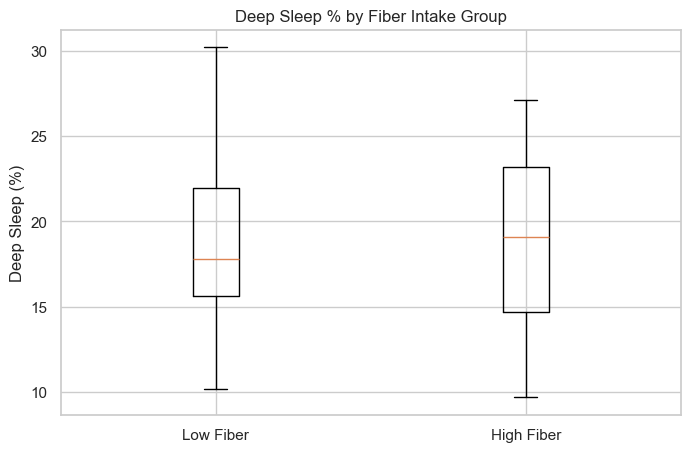

In [65]:
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

# Split the data: high fiber vs low fiber (median split)
fiber_median = filtered_df['Fiber (g)'].median()
high_fiber = filtered_df[filtered_df['Fiber (g)'] > fiber_median]['Deep Sleep (%)']
low_fiber = filtered_df[filtered_df['Fiber (g)'] <= fiber_median]['Deep Sleep (%)']

# Mann-Whitney U Test
stat, p_value = mannwhitneyu(high_fiber, low_fiber, alternative='greater')  # one-tailed test

# Display results
print("Fiber Median:", fiber_median)
print("Mann-Whitney U Statistic:", stat)
print("P-value:", p_value)

# Visualize the groups
plt.figure(figsize=(8, 5))
# plt.boxplot([low_fiber, high_fiber], labels=['Low Fiber', 'High Fiber'])
plt.boxplot([low_fiber, high_fiber], tick_labels=['Low Fiber', 'High Fiber'])
plt.title("Deep Sleep % by Fiber Intake Group")
plt.ylabel("Deep Sleep (%)")
plt.show()


### 🧪 Hypothesis Test 1: Does higher fiber intake improve deep sleep?

- **Test Used:** Mann-Whitney U Test (one-tailed)
- **Null Hypothesis (H₀):** Fiber intake has no effect on deep sleep %
- **Alternative Hypothesis (H₁):** Higher fiber intake increases deep sleep %

- **Fiber Median:** 28.5 g
- **Mann-Whitney U Statistic:** 612.0  
- **P-value:** 0.5047

#### ❌ Interpretation:
Since the p-value is **greater than 0.05**, we **fail to reject the null hypothesis**.  
This means that based on the current data, we do **not** find statistically significant evidence that higher fiber intake leads to improved deep sleep percentage.

However, the boxplot still provides useful insight into individual variance and could help guide future investigation.


### 🧪 Hypothesis Test 2: Does eating earlier improve sleep efficiency?

- **Test:** Spearman correlation
- **H₀ (null hypothesis):** There is no association between hours before sleep and sleep efficiency.
- **H₁ (alternative hypothesis):** More hours before sleep (i.e., eating earlier) is associated with higher sleep efficiency.


Spearman Correlation Coefficient: -0.0284
P-value: 0.8153


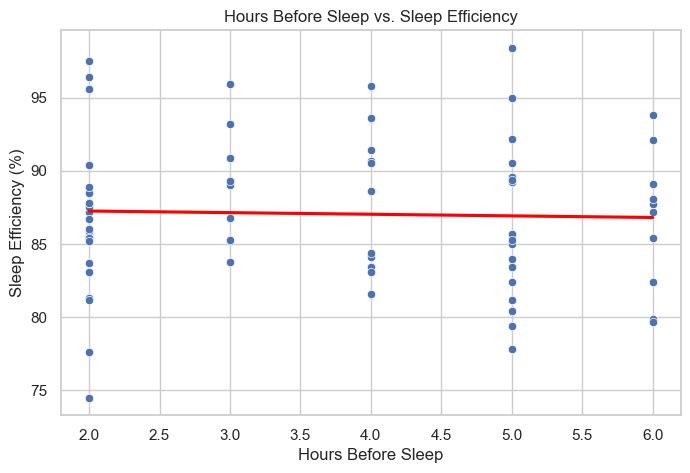

In [66]:
from scipy.stats import spearmanr

# Run Spearman correlation
x = filtered_df['Hours Before Sleep']
y = filtered_df['Sleep Efficiency (%)']

corr, p_value = spearmanr(x, y)

print("Spearman Correlation Coefficient:", round(corr, 4))
print("P-value:", round(p_value, 4))

# Visualize
plt.figure(figsize=(8, 5))
sns.scatterplot(x=x, y=y)
sns.regplot(x=x, y=y, scatter=False, ci=None, color='red')
plt.title("Hours Before Sleep vs. Sleep Efficiency")
plt.xlabel("Hours Before Sleep")
plt.ylabel("Sleep Efficiency (%)")
plt.grid(True)
plt.show()


### 🧪 Hypothesis Test 2: Does eating earlier improve sleep efficiency?

- **Test Used:** Spearman Rank Correlation
- **Null Hypothesis (H₀):** There is no association between hours before sleep and sleep efficiency.
- **Alternative Hypothesis (H₁):** More hours before sleep (i.e., eating earlier) is associated with higher sleep efficiency.

- **Spearman Correlation Coefficient:** -0.0284  
- **P-value:** 0.8153

#### ❌ Interpretation:
The p-value is well above 0.05, so we **fail to reject the null hypothesis**. This means we found **no statistically significant relationship** between meal timing and sleep efficiency in this dataset.

Although eating earlier is often recommended for better sleep, this result suggests the effect may be subtle, nonlinear, or masked by other variables such as stress, light exposure, or variability in sleep timing.


### 🧪 Hypothesis Test 3: Does protein intake influence REM sleep percentage?

- **Test:** Spearman correlation
- **H₀ (null hypothesis):** Protein intake has no effect on REM sleep percentage.
- **H₁ (alternative hypothesis):** Higher protein intake is associated with a change in REM sleep percentage.


Spearman Correlation Coefficient: -0.2828
P-value: 0.0177


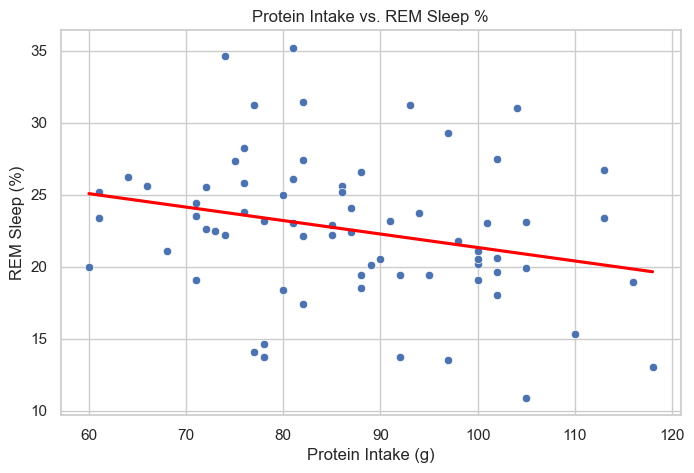

In [67]:
# Spearman correlation between protein intake and REM sleep %
protein = filtered_df['Protein (g)']
rem_sleep = filtered_df['REM Sleep (%)']

corr_protein_rem, p_value_protein_rem = spearmanr(protein, rem_sleep)

print("Spearman Correlation Coefficient:", round(corr_protein_rem, 4))
print("P-value:", round(p_value_protein_rem, 4))

# Visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(x=protein, y=rem_sleep)
sns.regplot(x=protein, y=rem_sleep, scatter=False, ci=None, color='red')
plt.title("Protein Intake vs. REM Sleep %")
plt.xlabel("Protein Intake (g)")
plt.ylabel("REM Sleep (%)")
plt.grid(True)
plt.show()


### 🧪 Hypothesis Test 3: Does protein intake influence REM sleep percentage?

- **Test Used:** Spearman Rank Correlation
- **Null Hypothesis (H₀):** Protein intake has no effect on REM sleep percentage.
- **Alternative Hypothesis (H₁):** Higher protein intake is associated with a change in REM sleep percentage.

- **Spearman Correlation Coefficient:** -0.2828  
- **P-value:** 0.0177

#### ✅ Interpretation:
Since the p-value is **less than 0.05**, we reject the null hypothesis and conclude that there is a **statistically significant negative correlation** between protein intake and REM sleep percentage.

This suggests that higher protein intake may be associated with **reduced REM sleep**. While more research would be needed to confirm causality, this finding aligns with some literature that suggests heavy or high-protein meals may reduce REM duration due to digestive load or neurotransmitter impact (e.g., tryptophan competition).
